# Bullseye

An example of how toroidal coordinates is more reliable than circular coordinates when more than one prominent class is present. In this example, we seek to find a single circle-valued map that parametrizes all circularities present in the data at once. For this, we first find a circle-valued map representing each class and then add together these circle-valued maps into a single circle-valued map.

We use two approaches. In one, we use toroidal coordinates to find three "geometrically independent" circle-valued maps and then sum them together. In the second, we run circular coordinates three times with different cocycles and sum the output circle-valued maps together.

In [1]:
from dreimac import ToroidalCoords, CircularCoords, GeometryExamples, PlotUtils, CircleMapUtils
from persim import plot_diagrams

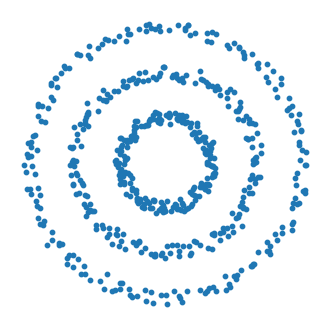

In [2]:
X = GeometryExamples.bullseye()
PlotUtils.plot_2d_scatter_with_different_colorings(X, point_size=10)

The persistence diagram suggests that there are three prominent 1-dimensional holes.

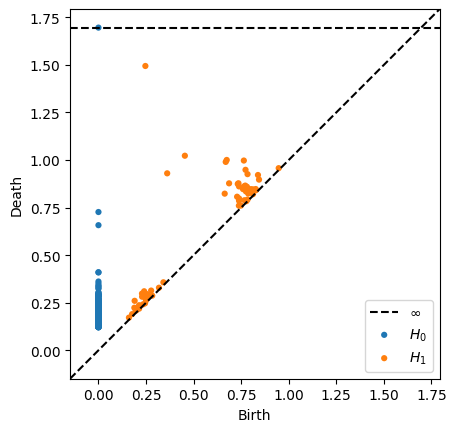

In [3]:
n_landmarks = 300

tc = ToroidalCoords(X, n_landmarks=n_landmarks)
plot_diagrams(tc.dgms_)

We now run the toroidal coordinates algorithm with the 3 most prominent classes and plot the result.

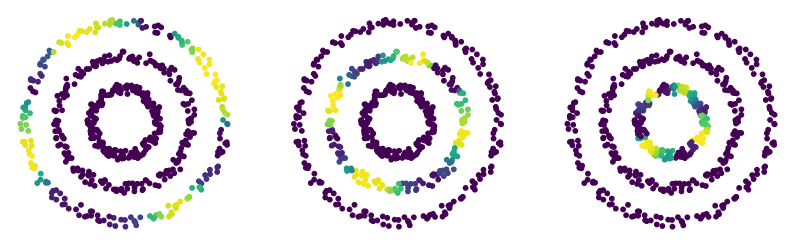

In [4]:
perc = 0.2
cohomology_classes = [0, 1, 2]
toroidal_coords = tc.get_coordinates(
    perc=perc, cocycle_idxs=cohomology_classes, standard_range=False
)

t_col1 = CircleMapUtils.levelset_coloring(toroidal_coords[0])
t_col2 = CircleMapUtils.levelset_coloring(toroidal_coords[1])
t_col3 = CircleMapUtils.levelset_coloring(toroidal_coords[2])

# the three circle-valued maps returned by toroidal coordinates
PlotUtils.plot_2d_scatter_with_different_colorings(
    X, [t_col1, t_col2, t_col3], point_size=10
)


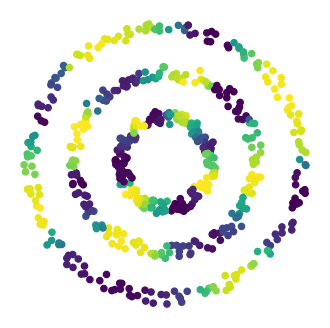

In [5]:
# the sum of the three maps returned by toroidal coordinates

t_sum = CircleMapUtils.linear_combination(
    [toroidal_coords[0], toroidal_coords[1], toroidal_coords[2]], [1, 1, 1]
)

t_col_sum = CircleMapUtils.levelset_coloring(t_sum)
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_col_sum], point_size=20)


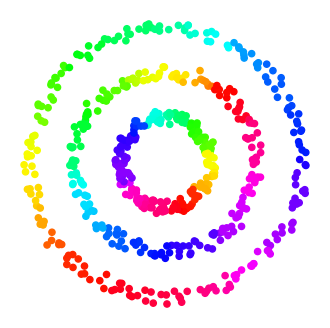

In [6]:
# plot same circle-valued map but with cyclic colormap
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_sum], point_size=20, cmap="hsv")

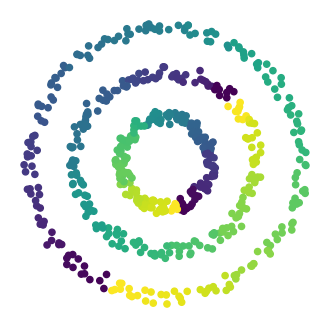

In [7]:
# plot same circle-valued map but with non-cyclic colormap
PlotUtils.plot_2d_scatter_with_different_colorings(X, [t_sum], point_size=20, cmap="viridis")

Run circular coordinates algorithm with three most prominent classes

In [8]:
cc = CircularCoords(X, n_landmarks=n_landmarks)
circular_coords1 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[0], standard_range=False)
circular_coords2 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[1], standard_range=False)
circular_coords3 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[2], standard_range=False)
circular_coords = [circular_coords1, circular_coords2, circular_coords3]

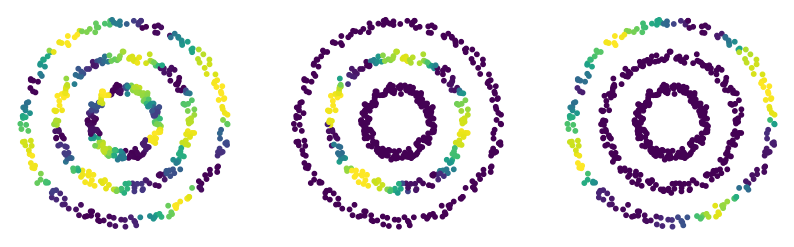

In [9]:
# the three circle-valued maps returned by circular coordinates
c_col1 = CircleMapUtils.levelset_coloring(circular_coords[0])
c_col2 = CircleMapUtils.levelset_coloring(circular_coords[1])
c_col3 = CircleMapUtils.levelset_coloring(circular_coords[2])

PlotUtils.plot_2d_scatter_with_different_colorings(X, [c_col1,c_col2,c_col3], point_size=10)

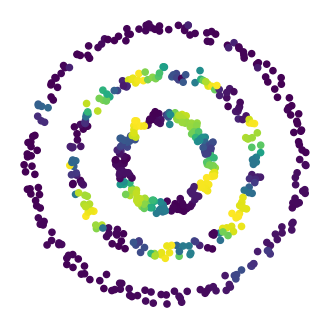

In [10]:
# the sum of the three circle-valued maps returned by circular coordinates

c_sum = CircleMapUtils.linear_combination(
    [circular_coords[0], circular_coords[1], circular_coords[2]], [1, 1, 1]
)
c_col_sum = CircleMapUtils.levelset_coloring(c_sum)
PlotUtils.plot_2d_scatter_with_different_colorings(X, [c_col_sum], point_size=20)

Note how the sum right above is not parametrizing the outermost circle, its parametrizing *twice* the circle in the middle, and once the innermost circle